In [1]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

In [2]:
! cat ../data/swbook1_3e/textfiles/WAGE1.DES

In [3]:
data_path = "../data/swbook1_3e/textfiles/"

header_wage1 = ['wage', 'educ', 'exper', 'tenure', 'nonwhite', 'female', 'married', 'numdep', 
                'smsa', 'northcen', 'south', 'west', 'construc', 'ndurman', 'trcommpu', 'trade', 
                'services', 'profserv', 'profocc', 'clerocc', 'servocc', 'lwage', 'expersq', 'tenursq']

df_wage1 = pd.read_table(data_path + "/WAGE1.raw", sep="\s+", header=None, names=header_wage1)

df_wage1.head()


,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4


In [4]:
s_y = df_wage1.wage
df_X = pd.concat([pd.Series(np.ones(df_wage1.shape[0]), name='intercept'), 
                 df_wage1.educ, df_wage1.exper, df_wage1.tenure], axis = 1)
df_X_restricted = pd.concat([pd.Series(np.ones(df_wage1.shape[0]), name='intercept'), 
                            df_wage1.tenure], axis = 1)

In [5]:
df_X.head()

,intercept,educ,exper,tenure
0,1.0,11,2,0
1,1.0,12,22,2
2,1.0,11,2,0
3,1.0,8,44,28
4,1.0,12,7,2


In [6]:
X = df_X.values
y = s_y.values
X_restricted = df_X_restricted.values

In [7]:
beta = (np.linalg.inv(X.T @ X)) @ X.T @ y
beta
beta_restricted = (np.linalg.inv(X_restricted.T @ X_restricted)) @ X_restricted.T @ y

In [8]:
u = y - X @ beta
u_restricted = y - X_restricted @ beta_restricted
n, k = X.shape

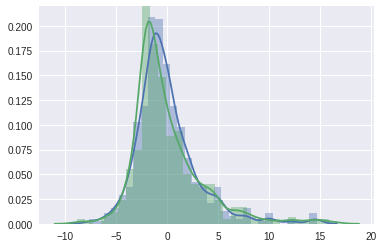

In [9]:
sns.distplot(u, kde=True)
# residuals approximately Gaussian => Important features are within model
sns.distplot(u_restricted, kde=True)

In [10]:
sig2 = u.T @ u / (n - k)
sig2_restricted = u_restricted.T @ u_restricted / (n - 2) 
#std = np.sqrt()
#std = np.sqrt(np.diag(sig2 * np.linalg.inv(X.T @ X)))
#std

In [11]:
F = ((sig2_restricted - sig2) / 2)/ (sig2/(n-k))

In [12]:
F

68.76404243751549

In [13]:
from scipy.stats import t

In [14]:
t.interval(0.90, n-k)

(-1.6477779439122966, 1.647777943912296)

In [17]:
df_wage1

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4
5,8.75,16,9,8,0,0,1,0,1,0,...,0,0,0,1,1,0,0,2.169054,81,64
6,11.25,18,15,7,0,0,0,0,1,0,...,0,1,0,0,1,0,0,2.420368,225,49
7,5.00,12,5,3,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1.609438,25,9
8,3.60,12,26,4,0,1,0,2,1,0,...,0,1,0,0,1,0,0,1.280934,676,16
9,18.18,17,22,21,0,0,1,0,1,0,...,0,0,0,0,1,0,0,2.900322,484,441


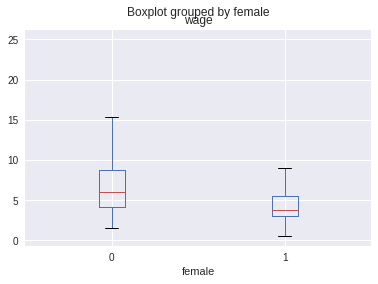

In [19]:
df_wage1.boxplot("wage", by="female")

In [25]:
from scipy import stats

In [26]:
p = stats.f.sf(f)

NameError: name 'grs' is not defined